In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import numpy as np
import seaborn as sns


In [30]:
data = pd.read_csv("/content/dataPreprocessed.csv")
data.shape
data.drop_duplicates(inplace=True)

print("No of Unique Job Descriptions: ", data['Job_Description'].count())
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:", stopword)


No of Unique Job Descriptions:  2258
Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
class_df = data.groupby('label').count()
class_df.style.background_gradient(cmap='PiYG')


,X,Title,Company,Location,Type,Salary,Contract_type,Job_Description,JobType,Industry,experience,exp_normailzed,type_norm,Contract_type_norm,salary1,salary_min,salary_max,salary_avg,salary_norm,annual_pay
label,,,,,,,,,,,,,,,,,,,,
High,1072,1072,1072,1072,1072,1072,1072,546,1072,1072,342,342,1072,1072,1072,1072,1072,1072,1072,1072
Low,750,750,750,750,750,750,750,578,750,750,292,292,750,750,750,750,750,750,750,750
Medium,1947,1947,1933,1947,1947,1947,1947,1134,1947,1947,704,704,1947,1947,1947,1947,1947,1947,1947,1947


In [32]:
def clean(job):
    job = job.lower()  # lower case
    job = re.sub(r'https?://\S+|www\.\S+', " ", job)  # URL
    # job = re.sub(r'@\w+', ' ', job)  # mentions
    # job = re.sub(r'#\w+', ' ', job)  # hashtags
    job = re.sub(r'[^\w\s]', ' ', job)  # punctuations
    # job = re.sub(r'\d+', ' ', job)  # digits
    job = re.sub('\[.*?\]', ' ', job)  # any punctuations left
    # any others charcters other than numbers and letters
    job = re.sub("[^a-z0-9]", " ", job)
    job = job.split()  # stopwords
    job = " ".join([word for word in job if not word in stopword])
    return job

In [33]:
data.head

<bound method NDFrame.head of         X                                        Title  \
0       1                  Construction Superintendent   
1       2                Regional Construction Manager   
2       3                 Construction Project Manager   
3       5                         Construction Manager   
4       8                         Construction Manager   
...   ...                                          ...   
3764  873                     Up Scale Server- Daytime   
3765  874                         Bartender and Server   
3766  875  Server - Average pay $30/hour - Weekly Pay!   
3767  879                           Fine Dining Server   
3768  880                                       Server   

                                Company  \
0     Curtis Construction Company, Inc.   
1                Chipotle Mexican Grill   
2           Perfetto Contracting Co Inc   
3                Chipotle Mexican Grill   
4            Black & Veatch Corporation   
...            

In [34]:
data['Job_Description'] = data['Job_Description'].astype(
    str).apply(lambda x: clean(x))
data['Job_Description'].sample(5)

max_len = len(max(data['Job_Description'], key=len))
print("Maximum length of Job Decription:", max_len)

Maximum length of Job Decription: 22949


In [35]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()


def lemmatize_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + lemmatizer.lemmatize(w) + " "
    return temp


In [37]:
data['Job_Description'] = data['Job_Description'].apply(
    lambda x: lemmatize_jobs(x))

In [38]:
stemmer = PorterStemmer()

def stem_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + stemmer.stem(w) + " "
    return temp


data['Job_Description'] = data['Job_Description'].apply(lambda x: stem_jobs(x))

x = data['Job_Description']
y = data['label']

In [39]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

train_X.shape

(3015,)

In [40]:
test_Y.shape

(754,)

In [41]:
# encoder = LabelEncoder()
# train_Y = encoder.fit_transform(train_Y)
# test_Y = encoder.fit_transform(test_Y)

LR TFIDF Accuracy Score ->  64.58885941644562
LR TFIDF F1 Score ->  0.5619421824799705
              precision    recall  f1-score   support

        High       0.79      0.20      0.31       214
         Low       0.83      0.51      0.63       150
      Medium       0.61      0.94      0.74       390

    accuracy                           0.65       754
   macro avg       0.74      0.55      0.56       754
weighted avg       0.70      0.65      0.60       754



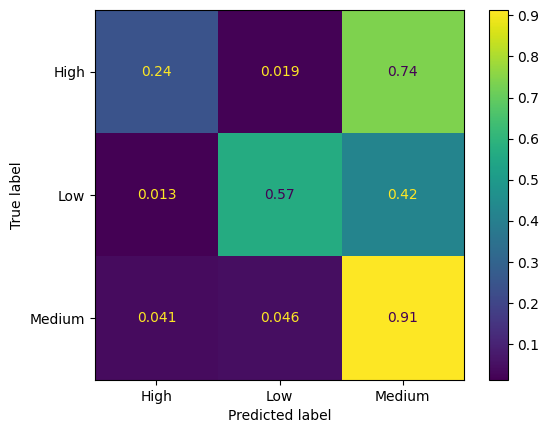

In [42]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)
lr1_pred = lr1.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr1_pred, test_Y)*100)
# lr_cm = confusion_matrix(test_Y, lr1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr1_pred, average='macro'))
print(classification_report(test_Y, lr1_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr1.classes_)
disp.plot()
plt.show()


LR TFIDF Accuracy Score ->  65.51724137931035
LR TFIDF F1 Score ->  0.5908456704918815
              precision    recall  f1-score   support

        High       0.75      0.25      0.37       214
         Low       0.79      0.57      0.66       150
      Medium       0.62      0.91      0.74       390

    accuracy                           0.66       754
   macro avg       0.72      0.58      0.59       754
weighted avg       0.69      0.66      0.62       754



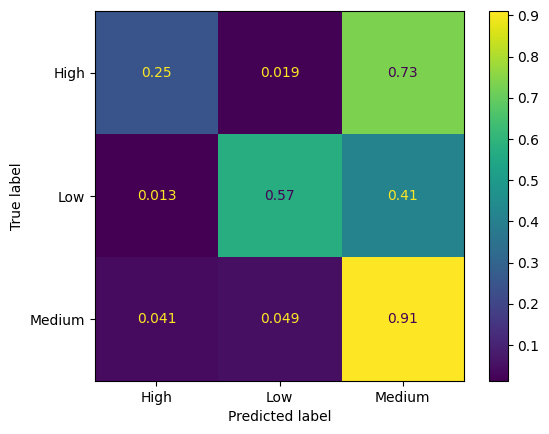

In [43]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)
lr1_pred = lr1.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr1_pred, test_Y)*100)
lr_cm = confusion_matrix(test_Y, lr1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr1_pred, average='macro'))
print(classification_report(test_Y, lr1_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr1.classes_)
disp.plot()
plt.show()

In [44]:
# vectorizer = TfidfVectorizer(ngram_range=(1, 3)).fit(train_X)
# train_X_tfidf = vectorizer.transform(train_X)
# test_X_tfidf = vectorizer.transform(test_X)
# lr = LogisticRegression(penalty="l2", multi_class="multinomial", solver="saga", C=1)
# lr.fit(train_X_tfidf, train_Y)
# lr_pred = lr.predict(test_X_tfidf)
# print("LR TFIDF Accuracy Score -> ", accuracy_score(lr_pred, test_Y)*100)

LR TFIDF Accuracy Score ->  64.72148541114059
LR TFIDF F1 Score ->  0.5640762852404643
              precision    recall  f1-score   support

        High       0.80      0.20      0.32       214
         Low       0.84      0.51      0.63       150
      Medium       0.60      0.95      0.74       390

    accuracy                           0.65       754
   macro avg       0.75      0.55      0.56       754
weighted avg       0.71      0.65      0.60       754



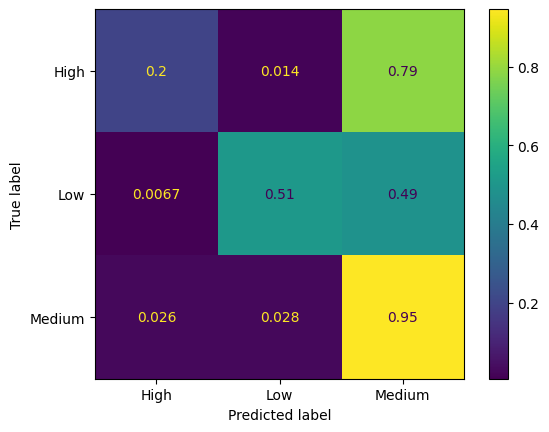

In [45]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr2 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr2.fit(train_X_tfidf,train_Y)
lr2_pred = lr2.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr2_pred, test_Y)*100)
lr2_cm = confusion_matrix(test_Y, lr2_pred, normalize="true")
# sns.heatmap(lr2_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr2_pred, average='macro'))
print(classification_report(test_Y, lr2_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=lr2_cm, display_labels=lr2.classes_)
disp.plot()
plt.show()

LR TFIDF Accuracy Score ->  65.6498673740053
LR TFIDF F1 Score ->  0.591887372652626
              precision    recall  f1-score   support

        High       0.74      0.25      0.37       214
         Low       0.81      0.57      0.67       150
      Medium       0.62      0.92      0.74       390

    accuracy                           0.66       754
   macro avg       0.72      0.58      0.59       754
weighted avg       0.69      0.66      0.62       754



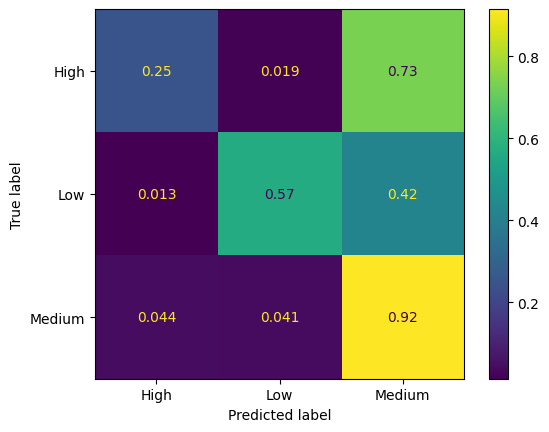

In [46]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr2 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr2.fit(train_X_tfidf,train_Y)
lr2_pred = lr2.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr2_pred, test_Y)*100)
lr2_cm = confusion_matrix(test_Y, lr2_pred, normalize="true")
# sns.heatmap(lr2_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr2_pred, average='macro'))
print(classification_report(test_Y, lr2_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=lr2_cm, display_labels=lr2.classes_)
disp.plot()
plt.show()

In [47]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
svm = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')
svm.fit(train_X_tfidf,train_Y)
svm_pred = svm.predict(test_X_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(svm_pred, test_Y)*100)

SVM Accuracy Score ->  66.44562334217507


SVM F1 Score ->  0.6120384173747442
              precision    recall  f1-score   support

        High       0.69      0.28      0.39       214
         Low       0.82      0.61      0.70       150
      Medium       0.63      0.90      0.74       390

    accuracy                           0.66       754
   macro avg       0.71      0.60      0.61       754
weighted avg       0.69      0.66      0.63       754



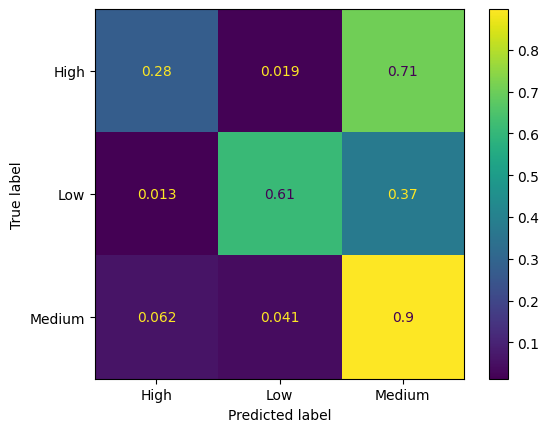

In [48]:
print("SVM F1 Score -> ", f1_score(test_Y, svm_pred, average='macro'))
print(classification_report(test_Y, svm_pred))
svm_cm = confusion_matrix(test_Y, svm_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_)
disp.plot()
plt.show()

SVM Accuracy Score ->  66.71087533156499
SVM F1 Score ->  0.6179107127755222
              precision    recall  f1-score   support

        High       0.70      0.29      0.41       214
         Low       0.81      0.61      0.70       150
      Medium       0.63      0.89      0.74       390

    accuracy                           0.67       754
   macro avg       0.72      0.60      0.62       754
weighted avg       0.69      0.67      0.64       754



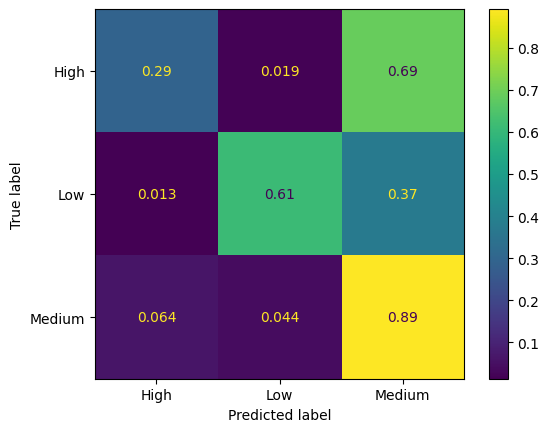

In [49]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
svm2 = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')
svm2.fit(train_X_tfidf,train_Y)
svm2_pred = svm2.predict(test_X_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(svm2_pred, test_Y)*100)
print("SVM F1 Score -> ", f1_score(test_Y, svm2_pred, average='macro'))
print(classification_report(test_Y, svm2_pred))
cm = confusion_matrix(test_Y, svm2_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm2.classes_)
disp.plot()
plt.show()